# パラメータチューニングの実践

__07-決定木モデルの作成__ で作成した決定木モデルのパラメータをチューニングする

## 対象データ

ここではSIGNATEの[【練習問題】銀行の顧客ターゲティングデータ](https://signate.jp/competitions/1/data)を使用している

### train.csv（学習データ）

* 説明変数：目的変数以外の全て
* 目的変数：y（定額預金申し込み有無）

### test.csv（評価データ）

* 説明変数：全て



## データの準備

ライブラリのインポート

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

CSVデータの読み込み

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('submit_sample.csv', header=None)

## 説明変数と目的変数の設定

### 学習データの説明変数を抽出する

目的変数y以外のカラムを説明変数に設定する

In [25]:
trainX = train.iloc[:, 0:17]

学習データの目的変数を抽出する

In [26]:
y = train['y']

### 評価データの説明変数を抽出する

全カラムを説明変数に設定する

In [27]:
testX = test.copy()

質的データをダミー変数化する

In [28]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

## モデルの準備

### モデルを表す変数を用意する

* 何個も作る可能性があるため項番を付与した変数にする
* パラメータは一旦、前回と同じにする

In [29]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションでモデルの精度を確認する

### fit関数（説明変数、目的変数の順に指定）でモデルを作成する

オプションの説明
* cv：データ分割数（Kに相当）
* scoring：評価尺度
* n_jobs：並列処理をするかどうか（-1で全てのCPUコア数を使用）

In [30]:
cross_validate(clf1, trainX, y, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

{'fit_time': array([0.05294514, 0.05447173, 0.05293131, 0.05172133, 0.05583668]),
 'score_time': array([0.00632143, 0.00544572, 0.0036037 , 0.00706005, 0.00472498]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73707281, 0.75910043]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162494, 0.746135  ])}

以下の精度に大差がないことが確認できる
* test_scoreで分割されたそれぞれの精度
* train_scoreで分割されたそれぞれの精度
* test_scoreとtrain_scoreの精度

## パラメータを変えて再度実行する

In [31]:
clf2 = DT(max_depth=10, min_samples_leaf=500)
cross_validate(clf2, trainX, y, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

{'fit_time': array([0.13238668, 0.1342268 , 0.12970948, 0.13023591, 0.12833548]),
 'score_time': array([0.00654626, 0.00671768, 0.00520587, 0.00666881, 0.00647473]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.8924153 , 0.88343681]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.8876343 , 0.885615  ])}

## グリッドサーチによるパラメータ探索

* 指定したパラメータ範囲の中で最適な精度を確認する方法
* 1つ1つパラメータを設定して精度を確かめる手間がない

## モデルの準備

新しく決定木モデルを表す変数を用意する

In [32]:
clf3 = DT()

探索するパラメータ範囲を表す変数を用意する

ここではmax_pedpthを2から10まで探索する

In [33]:
parameters = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}

rangeを使った書き方

In [34]:
parameters = {'max_depth':list(range(2, 11))}

変数の内容を確認する

In [35]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチとクロスバリデーションを組み合わせて最適なパラメータを探す

グリッドサーチの結果を変数gcvに代入し、fit関数を使って探索を実行する

In [36]:
gcv = GridSearchCV(clf3, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

結果を表示する

In [37]:
gcv.cv_results_

{'mean_fit_time': array([0.06224365, 0.09862099, 0.12721062, 0.13449979, 0.1458889 ,
        0.16321821, 0.19411354, 0.23861589, 0.22303042]),
 'std_fit_time': array([0.00254861, 0.01063128, 0.01016527, 0.00981382, 0.00425644,
        0.00572584, 0.00906386, 0.01144693, 0.02100842]),
 'mean_score_time': array([0.00749159, 0.00745554, 0.00719595, 0.00680275, 0.00619793,
        0.00785666, 0.00710578, 0.0087513 , 0.00631146]),
 'std_score_time': array([0.00079029, 0.00116228, 0.00115749, 0.0007459 , 0.00040139,
        0.00262372, 0.00080943, 0.00282152, 0.00140609]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

結果から重要な項目だけ取り出す

In [38]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

## 取り出した項目を可視化する

### x軸をmax_depth、y軸をaucとしてグラフを描く

このモデルではmax_depthの最小値を2に設定しているのでx軸を0～9から2～10に調整する

* 青：モデル構築用データ
* 橙：モデル検証用データ

([<matplotlib.axis.XTick at 0x1e7385da950>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

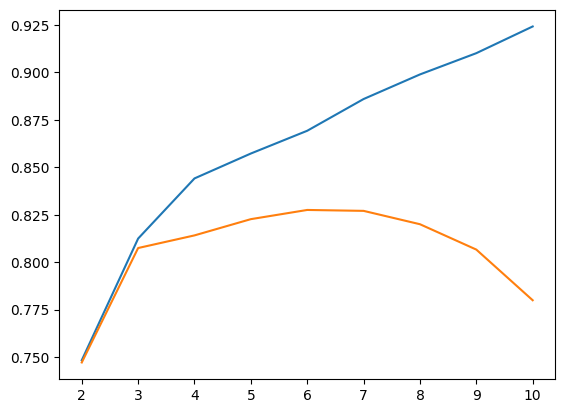

In [39]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], [2, 3, 4, 5, 6, 7, 8, 9, 10])

### パラメータの最適値を表示する

検証用データの精度が高く、構築用データとの乖離が少ない箇所を確認する

In [40]:
gcv.best_params_

{'max_depth': 6}

## 評価データの予測

### 予測結果を変数に代入する

gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測される

'max_depth': 6 を使った予測結果が代入される

In [41]:
pred = gcv.predict_proba(testX)

1の確率のみを取り出して再度代入

In [42]:
pred = pred[:, 1]

## モデルの評価

SIGNATEで評価する形式にデータを加工する

sampleファイルのカラム[1]に、予測結果を代入する

In [43]:
sample[1] = pred

sampleをCSVファイルに書き出す

In [44]:
sample.to_csv('submit2_bank.csv', index=None, header=None)

書き出したファイルを[SIGNATE](https://signate.jp/competitions/1/data)に投稿して評価を確認する